In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(4)

In [14]:
def load_data(string,path='../Datasets for Mid Sem Presentation/'):
    X = np.load(path+string+"_x.npy")
    y = np.load(path+string+"_y.npy")
    
    return X,y
        
    
def relative_cost(truth,pred):
    return np.mean(abs(pred-truth)/(1+truth))


def abs_error(pred,truth):
    return np.mean(np.abs(pred-truth))



In [3]:
test_x,test_y = load_data('test_data')
train_x,train_y = load_data("train_data_2")
v_x,v_y = load_data("val_data_2")

In [4]:
print (np.sum(v_x),np.sum(v_y))

(13875512.0, 13875511.0)


In [5]:
from sklearn.neighbors import KNeighborsRegressor
k_range = len(train_x)
errors = []
for i in range(2,k_range):
    neigh = KNeighborsRegressor(n_neighbors=i,weights='distance')
    neigh.fit(train_x, train_y) 
    errors.append(relative_cost(v_y,neigh.predict(v_x)))
    print (relative_cost(train_y,neigh.predict(train_x)))
    
    
    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


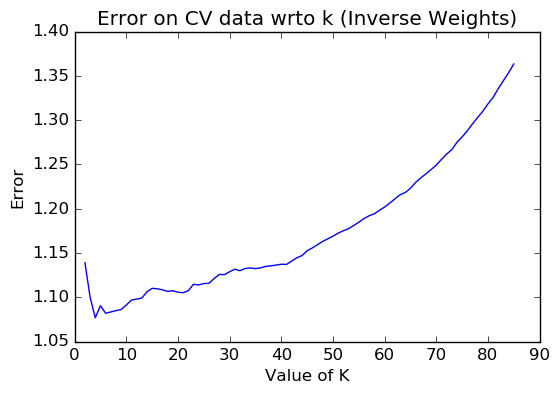

In [17]:
plt.close('all')
plt.plot(np.arange(2,k_range),errors)
plt.title('Error on CV data wrto k (Inverse Weights)')
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.rcParams.update({'font.size': 12})
plt.show()

In [7]:
min(errors)

1.0768895319635228

In [8]:
min_k = 2+errors.index(min(errors))

In [9]:
model  = KNeighborsRegressor(n_neighbors=min_k,weights='distance')
model.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='distance')

In [10]:
pred_train = model.predict(train_x)
pred_v = model.predict(v_x)
pred_test = model.predict(test_x)

In [11]:
train_cost = relative_cost(train_y,pred_train)
v_cost = relative_cost(v_y,pred_v)
test_cost = relative_cost(test_y,pred_test)

In [12]:
train_cost,test_cost,v_cost

(0.0, 0.9105077343631203, 1.0768895319635228)

In [15]:
train_cost = abs_error(train_y,pred_train)
v_cost = abs_error(v_y,pred_v)
test_cost = abs_error(test_y,pred_test)

In [16]:
train_cost,test_cost,v_cost

(0.0, 397.83497409842096, 428.32400510902977)

In [14]:
errors = abs(test_y - model.predict(test_x))/test_y
min_val = np.min(np.mean(errors,axis=1))
max_val = np.max(np.mean(errors,axis=1))
lst = np.mean(errors,axis=1)



/home/rithwik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [85]:
req_y = test_y[np.where(lst==min_val,True,False)]
req_x = test_x[np.where(lst==min_val,True,False)]
pred_x = model.predict(test_x)[np.where(lst==min_val,True,False)]

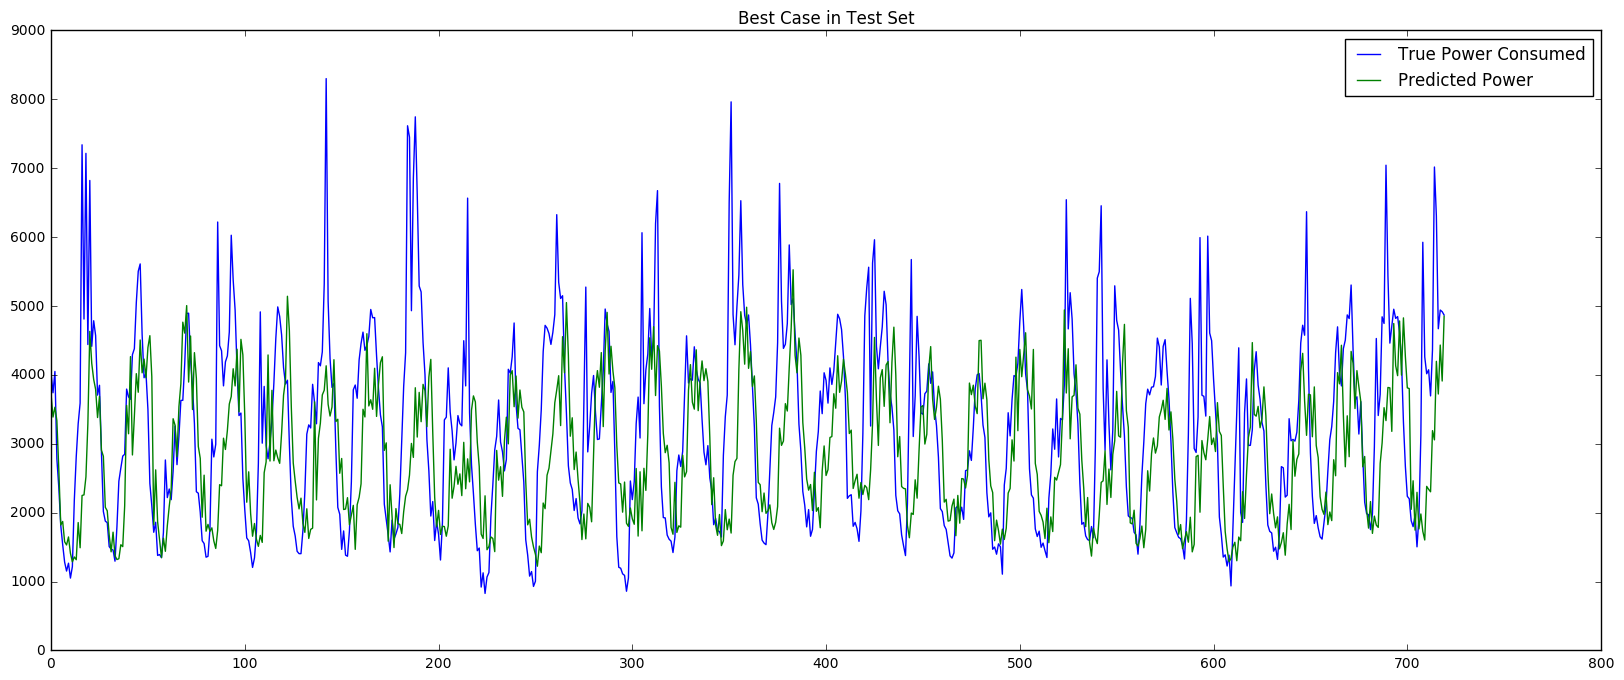

0.30722585

In [86]:
plt.close('all')
plt.figure(figsize=(20,8))

plt.plot(np.arange(0,720),req_y[0],label='True Power Consumed')
plt.plot(np.arange(0,720),pred_x[0],label='Predicted Power')
plt.title('Best Case in Test Set')
plt.legend()
plt.show()
min_val

In [87]:
req_y = test_y[np.where(lst==max_val,True,False)]
req_x = test_x[np.where(lst==max_val,True,False)]
pred_x = model.predict(test_x)[np.where(lst==max_val,True,False)]

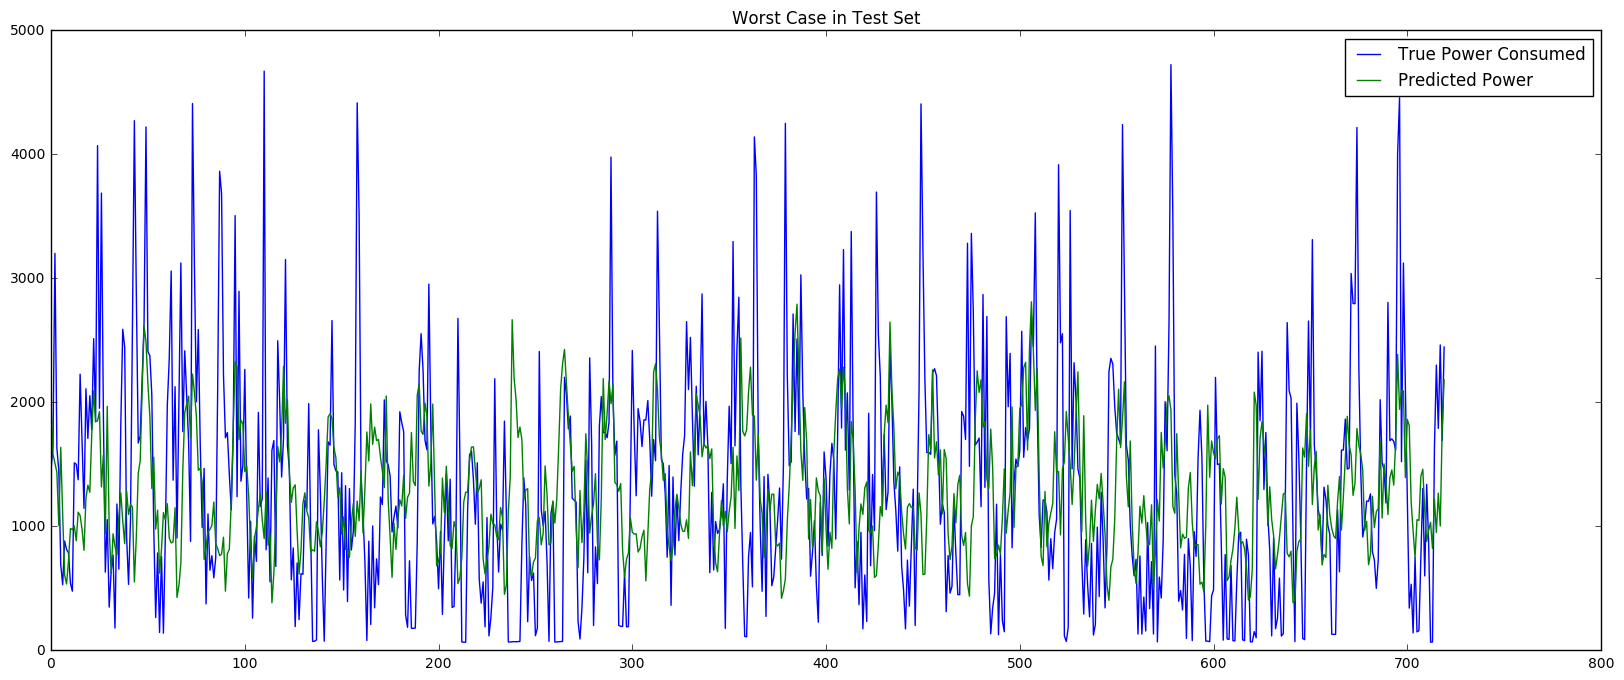

1.8694429

In [88]:
plt.close('all')
plt.figure(figsize=(20,8))

plt.plot(np.arange(0,720),req_y[0],label='True Power Consumed')
plt.plot(np.arange(0,720),pred_x[0],label='Predicted Power')
plt.title('Worst Case in Test Set')
plt.legend()
plt.show()
max_val

In [89]:
train_x.shape

(104, 30)